# Importing All Necessary Libraries

In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from matplotlib.pyplot import figure
import pickle

# Loading Dataset

In [25]:
dataset = pd.read_csv(r"C:\Users\nEW u\Desktop\all shortcuts\ALL\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 5 - Multiple Linear Regression\Multiple_Linear_Regression\minorprojectdata.csv")
dataset.head(50)

,Crop Name,Soil PH,Soil Moisture,Optimum Temperature
0,Sponsgomd,8.10,65,24.5
1,Sponsgomd,8.12,65,24.0
2,Sponsgomd,8.20,67,24.0
3,Sponsgomd,8.00,64,25.0
4,Sponsgomd,8.15,65,24.5
5,Sponsgomd,8.00,66,24.5
6,Sponsgomd,8.10,65,23.0
7,Sponsgomd,8.15,67,24.0
8,Sponsgomd,8.20,65,25.0
9,Sponsgomd,8.10,64,24.5


# Spilliting Dataset into Train-Test Set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset.drop('Crop Name',axis=1), dataset['Crop Name'], test_size=0.2)
Y_train

418       Black Gram
48       Ridge gourd
93          Brocouli
249         Red Gram
11     Pointed gourd
6          Sponsgomd
236              Oat
109           Papaya
345            Jowar
255         Soyabean
186        Caunation
245         Red Gram
24           Lettuce
395             Jute
430      Bensal Gram
110           Papaya
171    Chiysanthemum
371           Barley
174          Garbera
181          Garbera
149             Rose
192        Caunation
161         Marigold
281      French Bean
89          Brocouli
74           Cabbage
68           Cabbage
343            Jowar
10     Pointed gourd
81        Culiflower
           ...      
61             Onion
373           Barley
59             Onion
337      Bitter Bean
94          Brocouli
136         Tub Rose
359          Millets
8          Sponsgomd
246         Red Gram
402          Sunhemp
351          Millets
356          Millets
60             Onion
262            Rajma
77        Culiflower
303          Pumpkin
413       Bla

# Label Encoding 

In [27]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
Y_train = label_encoder.fit_transform(Y_train)

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
Y_test = label_encoder.fit_transform(Y_test)




# Training set Crops VS Testing set Crops Visualization

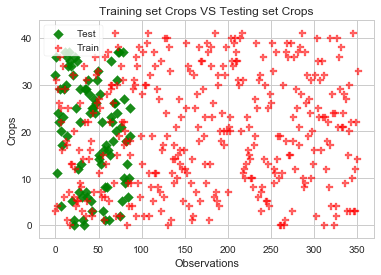

In [28]:
_, ax = plt.subplots()

ax.scatter(x = range(0, Y_test.size), y=Y_test, c = 'green', label = 'Test', alpha = 0.9,marker = 'D')
ax.scatter(x = range(0, Y_train.size), y=Y_train, c = 'red', label = 'Train', alpha = 0.6,marker = 'P')
plt.title('Training set Crops VS Testing set Crops')
plt.xlabel('Observations')
plt.ylabel('Crops')#no of label of crops
plt.legend(loc='upper left', frameon=True)
plt.show()

# Correlation Between Features

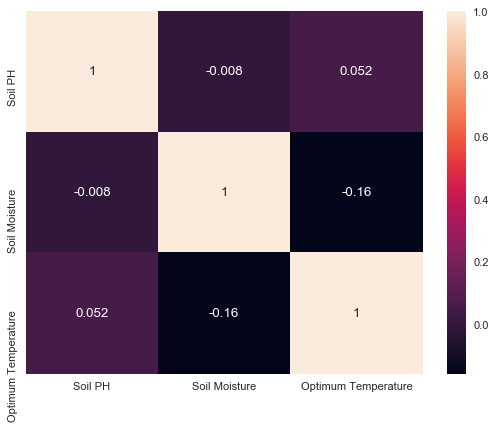

In [29]:
corr = X_train.corr()
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot = True)

# Model Estimation

## 1. DecisionTree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0,max_depth = 20,min_samples_leaf=2)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
y_pred




array([36.        , 40.        , 13.        , 26.        , 24.        ,
       28.        ,  8.        , 22.        , 19.        , 25.        ,
       33.        , 41.        , 34.        , 21.        , 40.        ,
       17.66666667, 41.        , 39.        ,  2.        ,  4.5       ,
       17.33333333,  0.        ,  1.        , 40.        , 27.        ,
       39.        ,  1.5       , 12.        , 33.        , 29.33333333,
       15.        ,  7.        ,  1.5       ,  4.        , 33.        ,
       33.        ,  5.        ,  8.        , 35.        , 18.        ,
       26.        ,  6.        ,  4.        , 27.        , 27.        ,
       29.        , 26.        , 28.        , 35.        , 37.        ,
       14.        , 16.        ,  8.        , 38.        , 24.        ,
        6.        , 18.        , 10.        ,  1.5       , 19.        ,
       26.        , 18.        ,  9.66666667, 22.33333333, 25.        ,
       39.        , 24.        , 20.        , 28.        , 28.  

## Model Evaluation

### (I)  1. Mean Absolute Error  2.RMSE 3.Accuracy  4.Visualization 


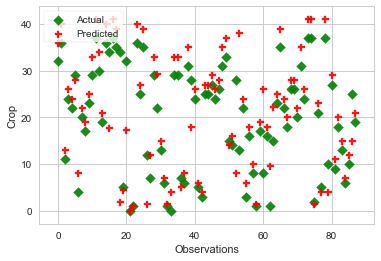

On Test
Mean Absolute Error: 4.191287878787879
RMSE: 6.692775578898111
accuracy: 0.8999384041409497


In [31]:
_, ax = plt.subplots()
ax.scatter(x = range(0, Y_test.size), y=Y_test, c = 'green', label = 'Actual', alpha = 0.9,marker = 'D')
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.9,marker = 'P')
#plt.Mean Absolute Errortitle('Actual and Predicted values')
plt.xlabel('Observations')
plt.ylabel('Crop')
plt.legend(loc='upper left', frameon=True)
plt.show()
print("On Test")
print("Mean Absolute Error:",mean_absolute_error(Y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred)))
accuracy = regressor.score(X_train,Y_train)
print("accuracy:",accuracy)

# Grid Search

In [32]:
from sklearn.model_selection import GridSearchCV
grid=[{'max_depth':[20,30,40,50],'min_samples_split':[70,90,110,130,150,170],'min_samples_leaf':[2,3,4,5,6,7,8]}]
grid_search=GridSearchCV(regressor,grid,cv=7,scoring='neg_mean_squared_error')
grid_search.fit(X_train,Y_train)
grid_search.best_params_

D:\Anacondanew\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 70}

# Actual vs Prediction

Text(0,0.5,'Predictions')

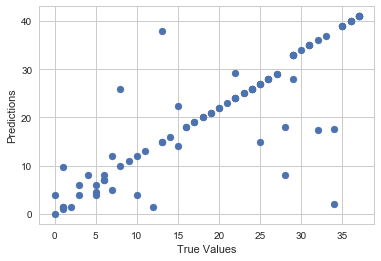

In [33]:
plt.scatter(Y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Outlier

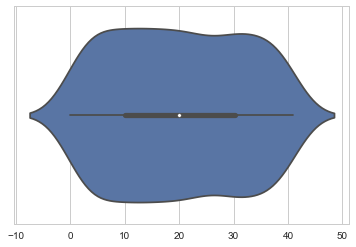

In [34]:
import seaborn as sns
sns.set(style="whitgrid")
ax = sns.violinplot(x=Y_train) 

# Model Serialization

In [35]:
import pickle
with open('1607232old.pkl', 'wb') as fid:
    pickle.dump(regressor, fid)
    
my_random_forest = pickle.load(open("1607232old.pkl",'rb'))
my_random_forest

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

## 2. Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators =10,max_depth =10, random_state = 0)
regressor1.fit(X_train,Y_train)
y_pred1 = regressor1.predict(X_test)
y_pred1


array([36.        , 36.2       , 15.58461538, 22.74584717, 22.58917329,
       26.73531785, 19.3362527 , 20.06666667, 19.15948502, 25.        ,
       29.44314614, 40.1       , 34.        , 20.18326559, 35.5       ,
       18.12472016, 41.        , 39.        , 20.10329159, 10.69090909,
       30.3097561 ,  0.67368421,  8.10472016, 35.1       , 24.3       ,
       35.9       ,  7.08410032, 17.13968785, 29.40274209, 25.50269151,
       14.58461538, 13.20772885,  4.58410032,  2.47368421, 24.96814614,
       22.77439614,  6.76109666,  7.75254109, 31.7       , 18.1680921 ,
       13.39471551,  6.07368421,  4.        , 21.58461538, 23.1       ,
       27.2       , 19.19107421, 26.73531785, 35.        , 31.6       ,
       12.4709041 , 16.64162821, 17.12791937, 18.28461538, 22.58917329,
        4.        , 16.17037338, 18.34      ,  4.68410032, 19.15948502,
       22.        , 18.89441184,  7.71981461, 18.75593524, 25.        ,
       39.        , 22.95287699, 19.07234957, 25.53709563, 26.73

### (II) 1.Mean Absolute Error  2.RMSE 3.Accuracy  4.Visualization 


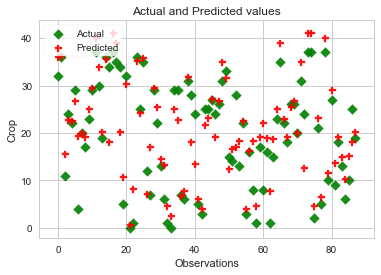

On Test
Mean Absolute Error: 3.6418233576643573
RMSE: 5.135124901030024
accuracy: 0.8752592634625824


In [37]:
_, ax = plt.subplots()
ax.scatter(x = range(0, Y_test.size), y=Y_test, c = 'green', label = 'Actual', alpha = 0.9,marker = 'D')
ax.scatter(x = range(0, y_pred1.size), y=y_pred1, c = 'red', label = 'Predicted', alpha = 0.9,marker = 'P')
plt.title('Actual and Predicted values')
plt.xlabel('Observations')
plt.ylabel('Crop')
plt.legend(loc='upper left', frameon=True)
plt.show()
print("On Test")
print("Mean Absolute Error:",mean_absolute_error(Y_test,y_pred1))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_pred1)))
accuracy = regressor1.score(X_train,Y_train)
print("accuracy:",accuracy)

# Actual vs Prediction

Text(0,0.5,'Predictions')

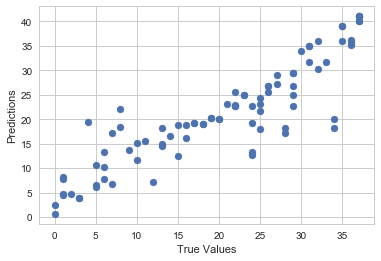

In [38]:
plt.scatter(Y_test,y_pred1)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Model' Serialization 

In [39]:
import pickle
with open('1607232new.pkl', 'wb') as fid:
    pickle.dump(regressor1, fid)
    
my_random_forest = pickle.load(open("1607232new.pkl",'rb'))
my_random_forest 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

# Comparison Between Two Models

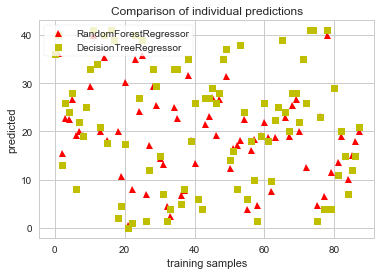

In [40]:
import matplotlib.pyplot as plt

plt.plot(regressor1.predict(X_test), 'r^', label='RandomForestRegressor')
plt.plot(regressor.predict(X_test), 'ys', label='DecisionTreeRegressor')

plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc='upper left', frameon=True)
plt.title('Comparison of individual predictions')
plt.show()

## 3.Xg-Boost

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


On Test
Mean Absolute Error: 6.834766019474376
RMSE: 8.658335038678507


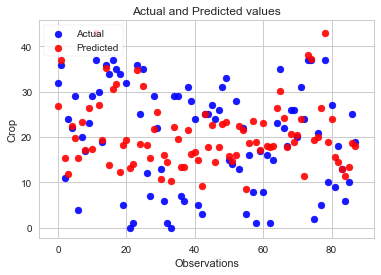

In [41]:
!pip install xgboost
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.05,max_depth = 6, alpha = 5, n_estimators = 100)
xg_reg.fit(X_train,Y_train)
preds2 = xg_reg.predict(X_test)

print("On Test")
print("Mean Absolute Error:",mean_absolute_error(Y_test,preds2))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, preds2)))



ax.scatter(x = range(0, Y_test.size), y=Y_test, c = 'blue', label = 'Actual', alpha = 0.9)
ax.scatter(x = range(0, preds2.size), y=preds2, c = 'red', label = 'Predicted', alpha = 0.9)

plt.title('Actual and Predicted values')
plt.xlabel('Observations')
plt.ylabel('Crop')
plt.legend(loc='upper left', frameon=True)
plt.show()

# A Set Of Testing Value from Sensors
###### Any Test Set Contains Three Values. e.g X_TEST = ["Soil Ph Value","RH value","Optimum Temperature"]


In [42]:
x_test1 = [5.5,65,28]
values = np.array([x_test1])

## Fitted to DecisionTree Regressor Model

In [43]:
regressor1 = DecisionTreeRegressor(random_state = 0,max_depth = 20)
regressor1.fit(X_train, Y_train)
y_pred = regressor1.predict(values)
y_predint = y_pred.astype(np.int64)
print("output",y_predint)

output [0]


## Fitted to Random Forest Regressor Model

In [44]:
regressor = RandomForestRegressor(n_estimators =10,max_depth =10, random_state = 0)
regressor.fit(X_train,Y_train)
y_pred1 = regressor.predict(values)
y_pred1int = y_pred1.astype(np.int64)
print(y_pred1int)

[2]


# Print the Predicted Crop

In [45]:
def crop_name (y_predint):
    if y_predint == 0:
        return "Barley"
    elif y_predint == 1:
        return "Bensal Gram"
    elif y_predint == 2:
        return "Bitter Bean"
    elif y_predint == 3:
        return "Black Gram"
    elif y_predint == 4:
        return "Braucoli"
    elif  y_predint == 5:
        return "Cabbage"
    elif y_predint == 6:
        return "Caunation"
    elif y_predint == 7:
        return "Chiysanthemum"
    elif y_predint == 8:
        return "Cucumber"
    elif y_predint == 9:
        return "CauliFlower"
    elif y_predint == 10:
        return "Dolichos Bean"
    elif y_predint == 11:
        return "Field-Pea"
    elif y_predint == 12:
        return "French-Bean"
    elif y_predint == 13:
        return "Garbera"
    elif y_predint == 14:
        return "Green Gram"
    elif y_predint == 15:
        return "Jasmine"
    elif y_predint == 16:
        return "Jowar"
    elif y_predint == 17:
        return "Jute"
    elif y_predint == 18:
        return "Lettuce"
    elif y_predint == 19:
        return "Maize"
    elif y_predint == 20:
        return "Mariegold"
    elif y_predint == 21:
        return "Millets"
    elif y_predint == 22:
        return "Oats"
    elif y_predint == 23:
        return "Okra"
    elif y_predint == 24:
        return "Onion"
    elif y_predint == 25:
        return "Pappya"
    elif y_predint == 26:
        return "Pointed Goud"
    elif y_predint == 27:
        return "Pumpkin"
    elif y_predint == 28:
        return "Rajma"
    elif y_predint == 29:
        return "Red-Gram"
    elif y_predint == 30:
        return "Rice"
    elif y_predint == 31:
        return "Ridge-Goud"
    elif y_predint == 32:
        return "Rose"
    elif y_predint == 33:
        return "Sorshum"
    elif y_predint == 34:
        return "Soyabeen"
    elif y_predint == 35:
        return "Spinach"
    elif y_predint == 36:
        return "Sponsgomd"
    elif y_predint == 37:
        return "Sugarcane"
    elif y_predint == 38:
        return "Sunhemp"
    elif y_predint == 39:
        return "Sweet Potato"
    elif y_predint == 40:
        return "Tube-Rose"
    elif y_predint == 41:
        return "Wheet"
crop = crop_name (y_predint) 
print(crop)

Barley


# Notification Via Email

In [46]:
import smtplib
def send_email(subject, msg):
    try:
        server = smtplib.SMTP('smtp.gmail.com:587)
        server.login('iotwithml@gmail.com','amartyaanirban')
        message = 'Subject: {}\n\n{}'.format(subject, msg)
        server.sendmail('iotwithml@gmail.com','amartyaroy1998@gmail.com', message)
        server.quit()
        print("Success: Email sent!")
    except:
        print("Email failed to send.")
subject = "Test "
msg =  crop
send_email(subject, msg)

Success: Email sent!
